# Some utils functions and load data

In [1]:
from svm import *
from utils import *

In [2]:
train = ('data/train_kernel.txt', 'data/train_linear.txt', 'data/train_multi.txt')
test = ('data/test_kernel.txt', 'data/test_linear.txt', 'data/test_multi.txt')

# Show the non-linear classifier

In [3]:
X_train, t_train = load_data_to_fit(train[0])
X_test, t_test = load_data_to_fit(test[0])

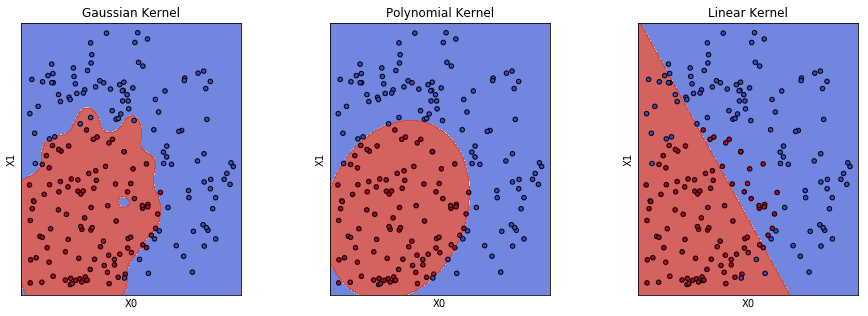

In [4]:
titles = ('Gaussian Kernel', 'Polynomial Kernel', 'Linear Kernel')
models = (SVM(kernel='g'), SVM(kernel='p'), SVM(kernel='l'))
for model in models:
    model.fit(X_train, t_train)
show_models(models, titles, X_test, t_test, (1,3), 'Kernel.png')

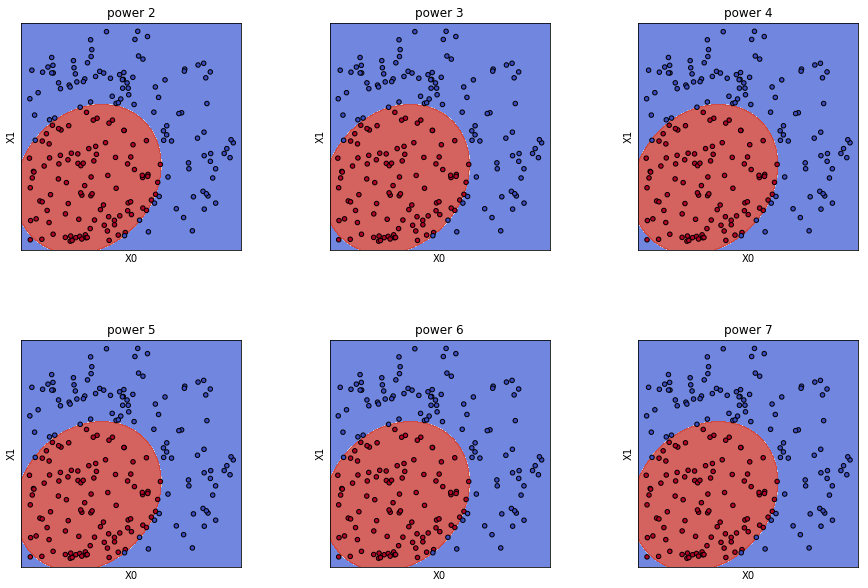

In [5]:
models = []
titles = []
for i in range(2, 8):
    models.append(SVM(C=1, kernel='p', power=i))
    titles.append('power {}'.format(i))
for model in models:
    model.fit(X_train, t_train)
show_models(models, titles, X_test, t_test, (2,3), 'Kernel.png')

# Show the linear classifier

In [3]:
X_train, t_train = load_data_to_fit(train[1])
X_test, t_test = load_data_to_fit(test[1])

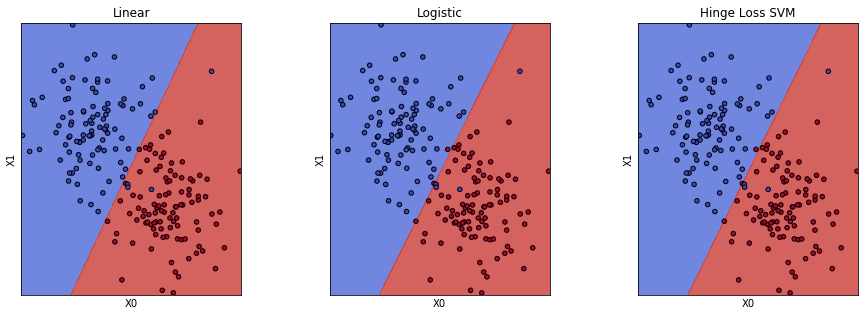

In [4]:
titles = ('Linear', 'Logistic', 'Hinge Loss SVM')
models = (Linear(), Logistic(), SVM(kernel='l', loss='hinge'))
models[0].fit(X_train, t_train, lr=0.0001)
models[1].fit(X_train, t_train, lr=0.001)
models[2].fit(X_train, t_train)
show_models(models, titles, X_test, t_test, (1,3), 'linear.png')

# Show the multi-classifier

In [7]:
X_train, t_train = load_data_to_fit(train[2])
X_test, t_test = load_data_to_fit(test[2])

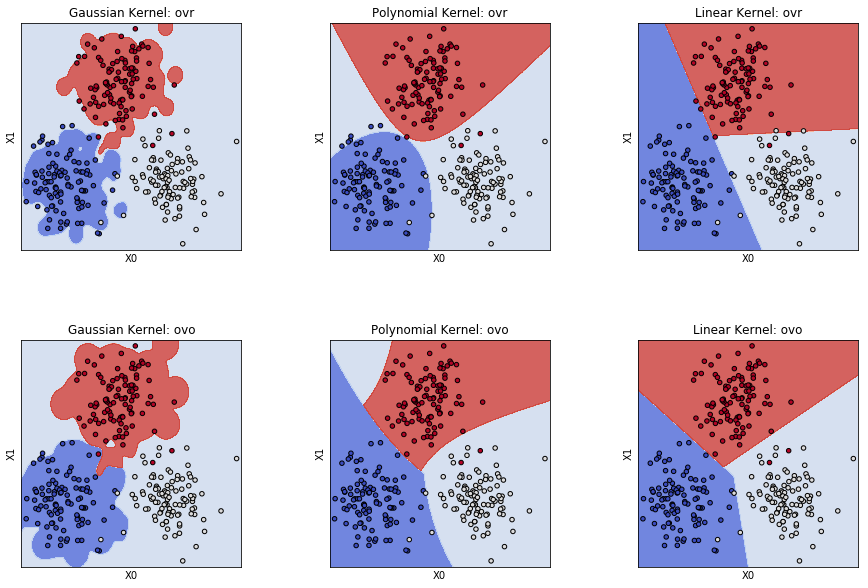

In [10]:
titles = ('Gaussian Kernel: ovr', 
          'Polynomial Kernel: ovr', 
          'Linear Kernel: ovr',
          
          'Gaussian Kernel: ovo',
          'Polynomial Kernel: ovo',
          'Linear Kernel: ovo')
models = (
    multiSVM(n_classes=3, kernel='g', decision_function_shape='ovr'), 
    multiSVM(n_classes=3, kernel='p', decision_function_shape='ovr'),
    multiSVM(n_classes=3, kernel='l', decision_function_shape='ovr'), 
    
    multiSVM(n_classes=3, kernel='g', decision_function_shape='ovo'),
    multiSVM(n_classes=3, kernel='p', decision_function_shape='ovo'),
    multiSVM(n_classes=3, kernel='l', decision_function_shape='ovo')
)
for model in models:
    model.fit(X_train, t_train)
show_models(models, titles, X_test, t_test, (2, 3), 'multi.png')